In [112]:
import pandas as pd

In [113]:
df = pd.read_csv('D:/ESCRITORIO/Github/Road to data science I/Database/IGN games from best to worst.csv')
df.head(3)

,title,score,score_phrase,platform,genre,release_year,release_month,release_day
0,Checkered Flag,10.0,Masterpiece,Lynx,Racing,1999,7,6
1,Chrono Trigger,10.0,Masterpiece,Wii,"Action, RPG",2011,5,25
2,Dragon Warrior III,10.0,Masterpiece,Game Boy Color,RPG,2001,7,20


In [114]:
df.shape

(18625, 8)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18625 entries, 0 to 18624
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          18625 non-null  object 
 1   score          18625 non-null  float64
 2   score_phrase   18625 non-null  object 
 3   platform       18625 non-null  object 
 4   genre          18589 non-null  object 
 5   release_year   18625 non-null  int64  
 6   release_month  18625 non-null  int64  
 7   release_day    18625 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 1.1+ MB


In [116]:
import matplotlib.pyplot as plt
%matplotlib inline

In [117]:
df.title.unique().shape

(12589,)

There are many different title names in the column of titles.

In [118]:
df.title.value_counts()

Cars                                           10
Open Season                                    10
Madden NFL 07                                  10
Brain Challenge                                 9
Madden NFL 08                                   9
                                               ..
Twin Blades HD                                  1
Ultimate Mortal Kombat                          1
Ultimate Muscle: Legends vs. New Generation     1
Ultimate Ride                                   1
Looney Tunes: Back in Action: Zany Race         1
Name: title, Length: 12589, dtype: int64

The maximum value count is of 10. Thus, this column won't be further analized

In [119]:
df_without_title_col = df.select_dtypes('O').drop('title',axis='columns')
df_without_title_col.head(3)

,score_phrase,platform,genre
0,Masterpiece,Lynx,Racing
1,Masterpiece,Wii,"Action, RPG"
2,Masterpiece,Game Boy Color,RPG


In [120]:
df_without_title_col.score_phrase.unique().shape

(11,)

In [121]:
df_without_title_col.score_phrase.value_counts()

Great          4773
Good           4741
Okay           2945
Mediocre       1959
Amazing        1804
Bad            1269
Awful           664
Painful         340
Unbearable       72
Masterpiece      55
Disaster          3
Name: score_phrase, dtype: int64

In [122]:
df_without_title_col.platform.unique().shape

(59,)

In [123]:
df_without_title_col.platform.value_counts()

PC                      3370
PlayStation 2           1686
Xbox 360                1631
Wii                     1366
PlayStation 3           1356
Nintendo DS             1045
PlayStation              952
Wireless                 910
iPhone                   842
Xbox                     821
PlayStation Portable     633
Game Boy Advance         623
GameCube                 509
Game Boy Color           356
Nintendo 64              302
Dreamcast                286
PlayStation 4            277
Nintendo DSi             254
Nintendo 3DS             225
Xbox One                 208
PlayStation Vita         155
Wii U                    114
iPad                      99
Lynx                      82
Macintosh                 81
Genesis                   58
NES                       49
TurboGrafx-16             40
Android                   39
Super NES                 33
NeoGeo Pocket Color       31
N-Gage                    30
Game Boy                  22
iPod                      17
Sega 32X      

In [124]:
df_without_title_col.genre.unique().shape

(113,)

For the genre column, there are many different values also. It won't be easy to visualize in a frequency bar figure. With some criteria, like value count less than 20, we could replace those genres with "other genre"

In [125]:
df_without_title_col.isna().sum()

score_phrase     0
platform         0
genre           36
dtype: int64

In [126]:
df_without_title_col = df_without_title_col[df_without_title_col.genre.isnull() == False]

In [127]:
df_without_title_col.isna().sum()

score_phrase    0
platform        0
genre           0
dtype: int64

In [128]:
df_without_title_col.head()

,score_phrase,platform,genre
0,Masterpiece,Lynx,Racing
1,Masterpiece,Wii,"Action, RPG"
2,Masterpiece,Game Boy Color,RPG
3,Masterpiece,Xbox 360,"Action, Adventure"
4,Masterpiece,PlayStation 3,"Action, Adventure"


In [129]:
df_without_title_col.genre.value_counts()

Action                      3797
Sports                      1916
Shooter                     1610
Racing                      1228
Adventure                   1175
                            ... 
RPG, Action                    1
Strategy, Simulation           1
Compilation, Compilation       1
Action, Editor                 1
Action, Strategy               1
Name: genre, Length: 112, dtype: int64

In [130]:
for i in df_without_title_col.genre:
    #print(i)
    #print(df_without_title_col.genre.iloc[i])
    try:
        if df_without_title_col.genre.value_counts()[i]<20:
            #print(i)
            df_without_title_col.genre = df_without_title_col.genre.replace(i,'other genre')
            
            #print(df_without_title_col.genre.iloc[i])
    except:
        a=2
    #print(i)    

In [131]:
def graficos_eda_categoricos(cat):

    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (10, filas * 12))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 6)

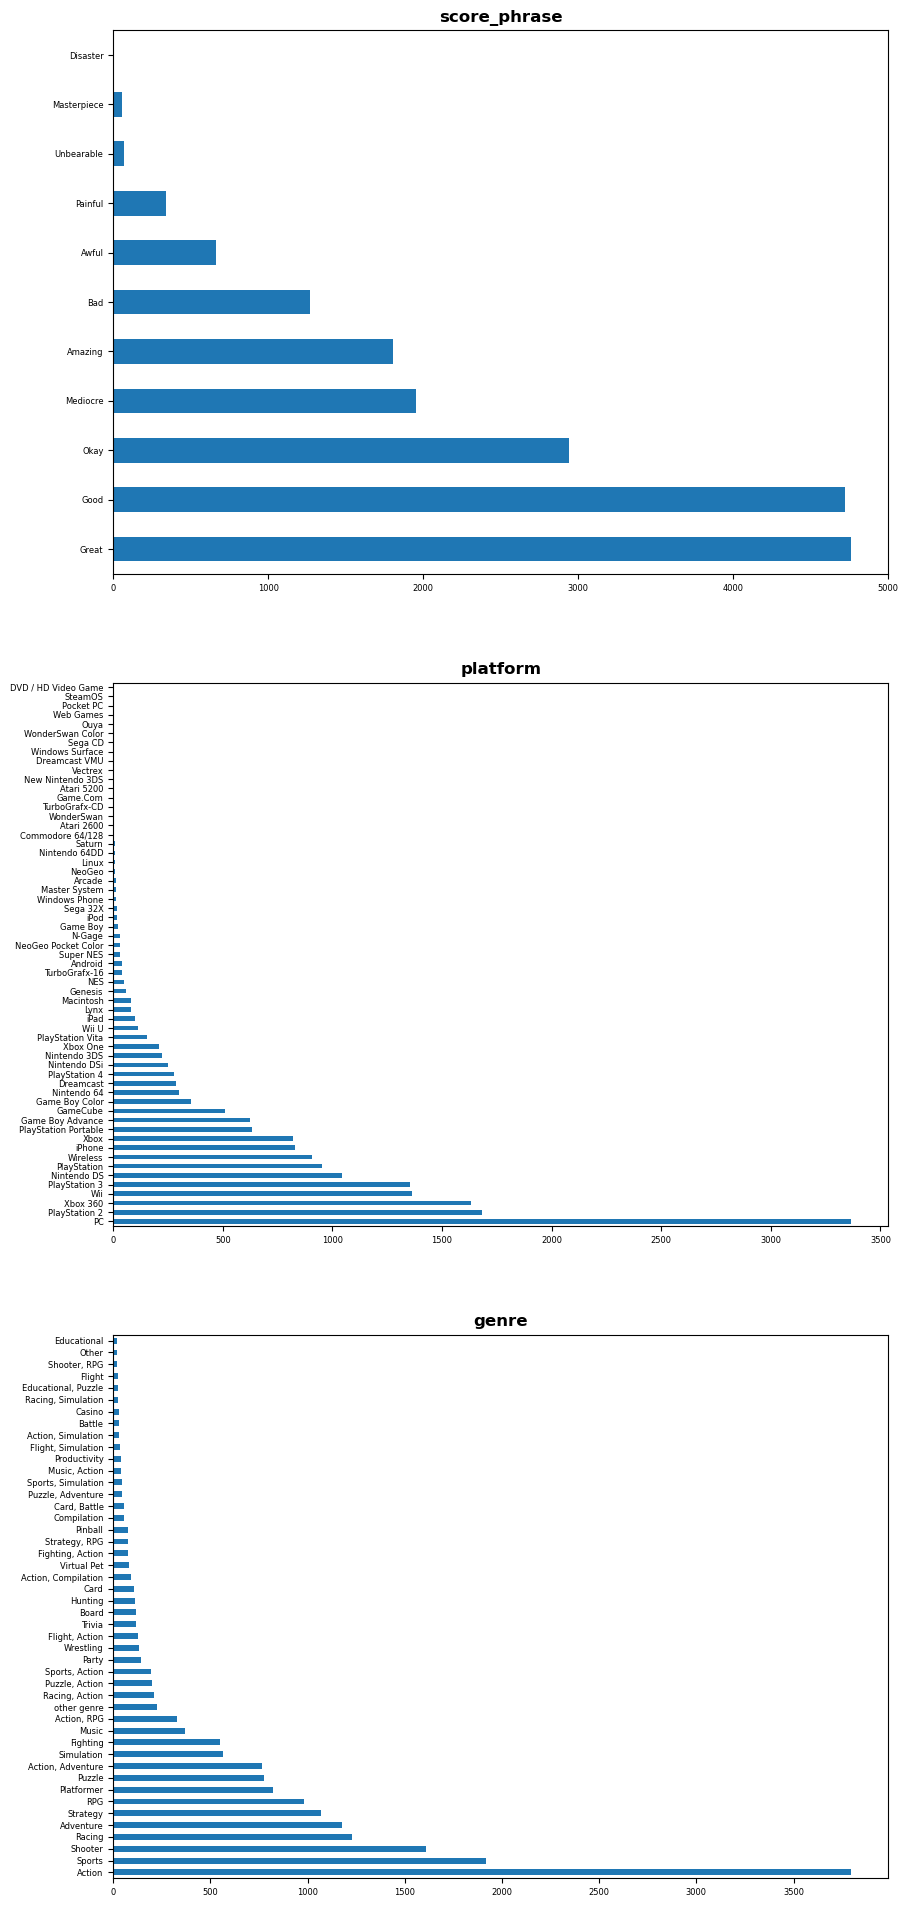

In [132]:
graficos_eda_categoricos(df_without_title_col)

In [133]:
def estadistic_cont(num):
    #Calculamos describe
    estadistics = num.describe().T
    #Añadimos la mediana
    estadistics['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadistics = estadistics.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadistics)

In [134]:
estadistic_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
score,18625.0,6.950459,7.3,1.711736,0.5,6.0,7.3,8.2,10.0
release_year,18625.0,2006.515329,2007.0,4.587529,1970.0,2003.0,2007.0,2010.0,2016.0
release_month,18625.0,7.138470,8.0,3.476710,1.0,4.0,8.0,10.0,12.0
release_day,18625.0,15.603866,16.0,8.690128,1.0,8.0,16.0,23.0,31.0


The deviations seems to be relatively low. All seems in order

In general, the scores are close to 7.0

In [135]:
df.score.mean()

6.950459060402685

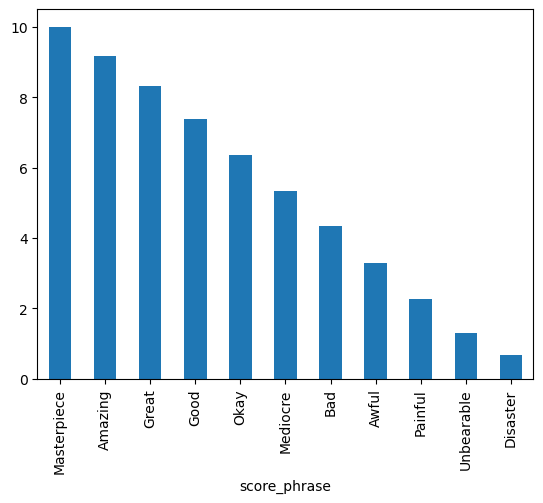

In [136]:
temp = df.groupby('score_phrase').score.mean().sort_values(ascending = False)
#print(temp)

temp.plot.bar();

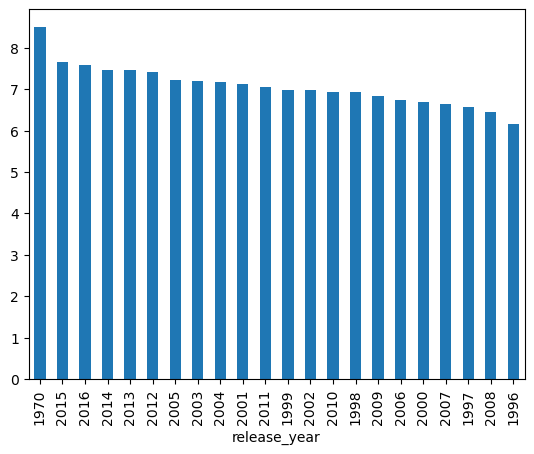

In [137]:
temp = df.groupby('release_year').score.mean().sort_values(ascending = False)
#temp = df.groupby('score_phrase').score
#print(temp)
temp.plot.bar();

<Axes: xlabel='release_year'>

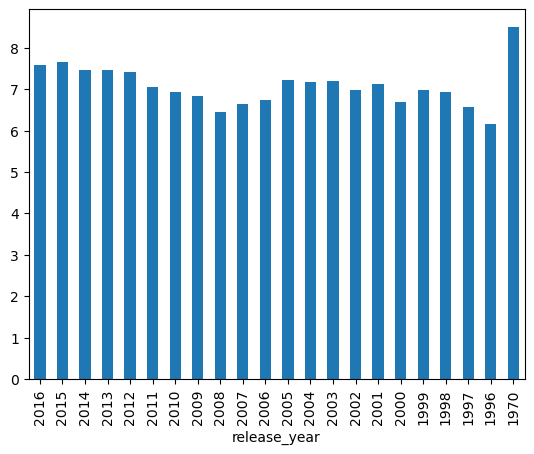

In [138]:
temp = df.groupby('release_year').score.mean().sort_index(ascending=False)
temp.plot.bar()

In [139]:
df.release_year.value_counts()

2008    1915
2009    1687
2007    1610
2010    1363
2006    1208
2005    1088
2011    1073
2000    1045
2004     997
2003     969
2002     936
1999     775
2012     753
2013     696
2001     688
2014     537
2015     365
1998     339
2016     226
1997     205
1996     149
1970       1
Name: release_year, dtype: int64

There is only one value for year of release 1970. It will be dropped that value since it is the only one for that year.

In [140]:
df[df.release_year == 1970].head()

,title,score,score_phrase,platform,genre,release_year,release_month,release_day
3682,The Walking Dead: The Game -- Episode 1: A New...,8.5,Great,Xbox 360,Adventure,1970,1,1


Xbox 360 wasn't even released in that year. Must be an error.

In [141]:
df = df[df['release_year'] != 1970]

In [142]:
df.release_year.value_counts()

2008    1915
2009    1687
2007    1610
2010    1363
2006    1208
2005    1088
2011    1073
2000    1045
2004     997
2003     969
2002     936
1999     775
2012     753
2013     696
2001     688
2014     537
2015     365
1998     339
2016     226
1997     205
1996     149
Name: release_year, dtype: int64

<Axes: xlabel='release_year'>

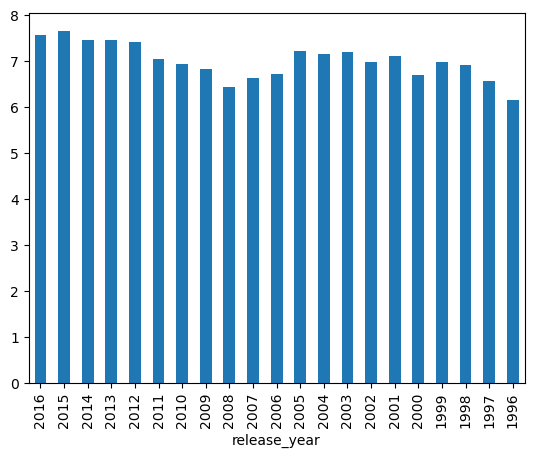

In [143]:
temp = df.groupby('release_year').score.mean().sort_index(ascending=False)
temp.plot.bar()

<Axes: xlabel='release_month'>

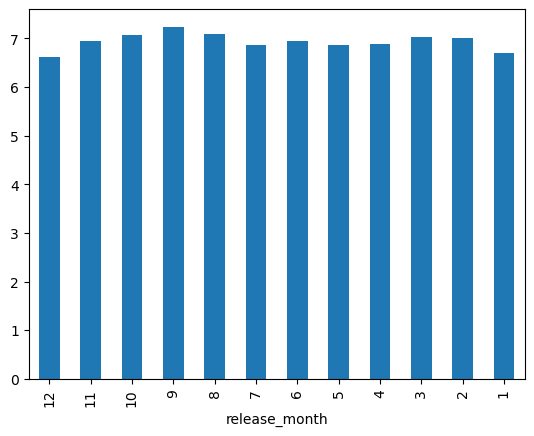

In [144]:
temp = df.groupby('release_month').score.mean().sort_index(ascending=False)
temp.plot.bar()

<Axes: xlabel='release_day'>

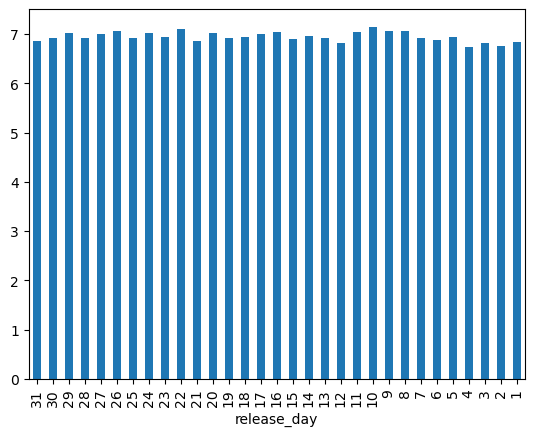

In [145]:
temp = df.groupby('release_day').score.mean().sort_index(ascending=False)
temp.plot.bar()

<Axes: xlabel='release_year'>

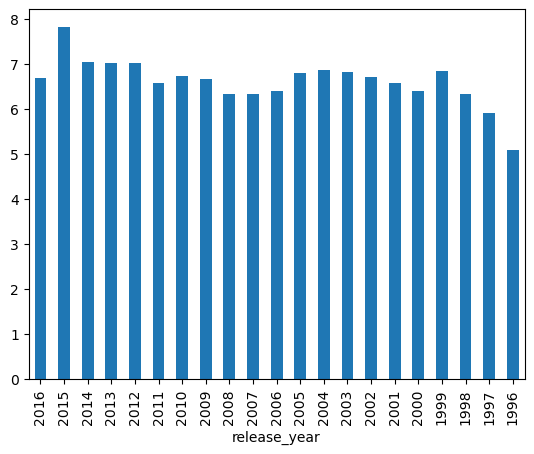

In [146]:
#temp = df.groupby(['release_year',df.genre == 'Action']).score.mean().sort_index(ascending=False)
temp = df[df['genre'] == 'Action'].groupby('release_year').score.mean().sort_index(ascending=False)
temp.plot.bar()

<Axes: xlabel='release_year'>

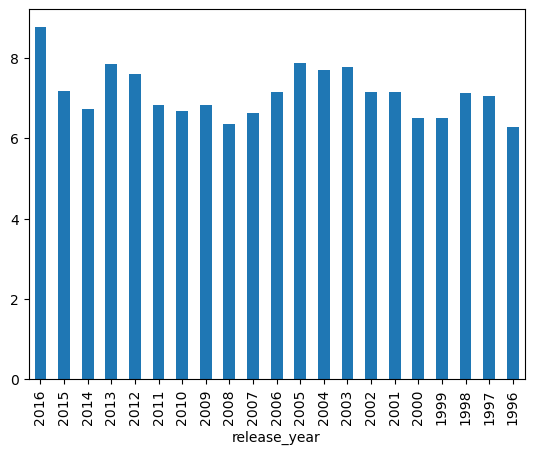

In [147]:
temp = df[df['genre'] == 'Sports'].groupby('release_year').score.mean().sort_index(ascending=False)
temp.plot.bar()

<Axes: xlabel='release_year'>

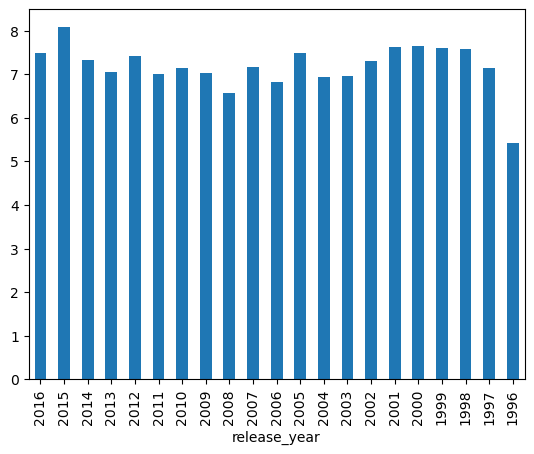

In [148]:
temp = df[df['genre'] == 'Shooter'].groupby('release_year').score.mean().sort_index(ascending=False)
temp.plot.bar()

<Axes: xlabel='release_year'>

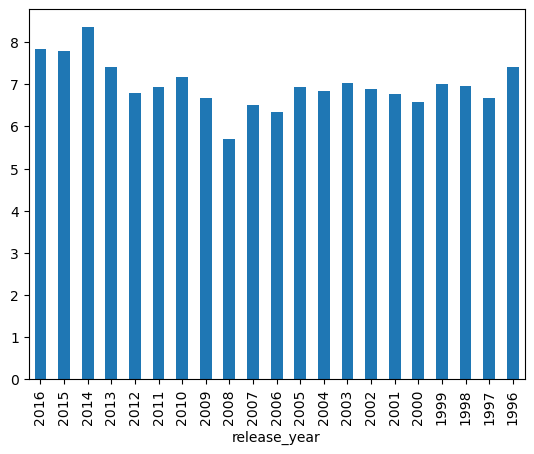

In [149]:
temp = df[df['genre'] == 'Racing'].groupby('release_year').score.mean().sort_index(ascending=False)
temp.plot.bar()

<Axes: xlabel='release_year'>

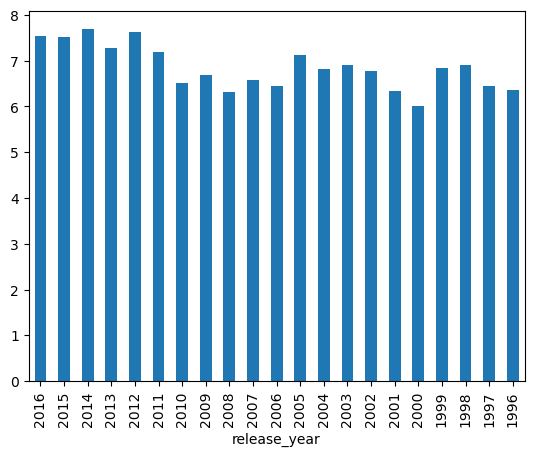

In [150]:
temp = df[df['genre'] == 'Adventure'].groupby('release_year').score.mean().sort_index(ascending=False)
temp.plot.bar()

For some genres, in years close to 1996, there is clear drop down in the score, but exploring other genres like Adventure or Racing, this is not the case.

It is assumed that the name of the game (title) isn't relevant for the final score, so I has been dropped this column. The release year should be important due to the genre of the game. There were some year where a certain genres were the most played or significant. However, the release month and day could be ignored (It is considered that these information in least impactful than the year of release).

In [151]:
df1 = df.drop(['title','release_month','release_day'], axis='columns')

for i in df1.genre:
    #print(i)
    #print(df_without_title_col.genre.iloc[i])
    try:
        if df1.genre.value_counts()[i]<20:
            df1.genre = df1.genre.replace(i,'other genre')
    except:
        a=2
    #print(i)  


df1.head(3)

,score,score_phrase,platform,genre,release_year
0,10.0,Masterpiece,Lynx,Racing,1999
1,10.0,Masterpiece,Wii,"Action, RPG",2011
2,10.0,Masterpiece,Game Boy Color,RPG,2001


In [152]:
df1.shape

(18624, 5)

In [153]:
df1.isna().sum()

score            0
score_phrase     0
platform         0
genre           36
release_year     0
dtype: int64

There are 36 null cells in the database related to the genre column. Because this quantity is quite low in comparison with the total no. of raws, I 'll drop them.

In [154]:
df2 = df1[df1.genre.isnull() == False]
df2.isna().sum()

score           0
score_phrase    0
platform        0
genre           0
release_year    0
dtype: int64

In [155]:
df2.genre.value_counts()

Action                 3797
Sports                 1916
Shooter                1610
Racing                 1228
Adventure              1174
Strategy               1071
RPG                     980
Platformer              823
Puzzle                  776
Action, Adventure       765
Simulation              567
Fighting                547
Music                   371
Action, RPG             330
other genre             225
Racing, Action          210
Puzzle, Action          200
Sports, Action          196
Party                   141
Wrestling               134
Flight, Action          125
Trivia                  119
Board                   116
Hunting                 112
Card                    108
Action, Compilation      89
Virtual Pet              82
Fighting, Action         77
Strategy, RPG            77
Pinball                  77
Compilation              54
Card, Battle             54
Puzzle, Adventure        47
Sports, Simulation       44
Music, Action            39
Productivity        

In [156]:
len(df2.genre.unique())

46

I 'll do one hot encoding to handle with the genre column.

In [157]:
ohe = pd.get_dummies(df2.genre)
ohe.head(3)

,Action,"Action, Adventure","Action, Compilation","Action, RPG","Action, Simulation",Adventure,Battle,Board,Card,"Card, Battle",...,Simulation,Sports,"Sports, Action","Sports, Simulation",Strategy,"Strategy, RPG",Trivia,Virtual Pet,Wrestling,other genre
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [158]:
df3 = pd.concat([df2,ohe],axis='columns')
df3.head()

,score,score_phrase,platform,genre,release_year,Action,"Action, Adventure","Action, Compilation","Action, RPG","Action, Simulation",...,Simulation,Sports,"Sports, Action","Sports, Simulation",Strategy,"Strategy, RPG",Trivia,Virtual Pet,Wrestling,other genre
0,10.0,Masterpiece,Lynx,Racing,1999,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10.0,Masterpiece,Wii,"Action, RPG",2011,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,10.0,Masterpiece,Game Boy Color,RPG,2001,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10.0,Masterpiece,Xbox 360,"Action, Adventure",2008,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10.0,Masterpiece,PlayStation 3,"Action, Adventure",2008,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


I 'll drop a column from the new ones incorporated to avoid the Dummy Variable Trap.

In [159]:
df4 = df3.drop('Action, Adventure', axis='columns')
df4.head(3)

,score,score_phrase,platform,genre,release_year,Action,"Action, Compilation","Action, RPG","Action, Simulation",Adventure,...,Simulation,Sports,"Sports, Action","Sports, Simulation",Strategy,"Strategy, RPG",Trivia,Virtual Pet,Wrestling,other genre
0,10.0,Masterpiece,Lynx,Racing,1999,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10.0,Masterpiece,Wii,"Action, RPG",2011,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10.0,Masterpiece,Game Boy Color,RPG,2001,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


For the case of the score_phrase column, I 'll map the different values to numeric values through a dictionary.

In [160]:
df4.score_phrase.unique()

array(['Masterpiece', 'Amazing', 'Great', 'Good', 'Okay', 'Mediocre',
       'Bad', 'Awful', 'Painful', 'Unbearable', 'Disaster'], dtype=object)

In [161]:
df4.score_phrase.value_counts()

Great          4764
Good           4725
Okay           2940
Mediocre       1957
Amazing        1803
Bad            1268
Awful           662
Painful         339
Unbearable       72
Masterpiece      55
Disaster          3
Name: score_phrase, dtype: int64

In [162]:
dictionary = {}
cont = 0
for key in df4.score_phrase.unique():
    dictionary[key] = cont
    cont += 1

In [163]:
df4['score_phrase_num'] = df4.score_phrase.map(dictionary)
df4.head(3)

,score,score_phrase,platform,genre,release_year,Action,"Action, Compilation","Action, RPG","Action, Simulation",Adventure,...,Sports,"Sports, Action","Sports, Simulation",Strategy,"Strategy, RPG",Trivia,Virtual Pet,Wrestling,other genre,score_phrase_num
0,10.0,Masterpiece,Lynx,Racing,1999,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10.0,Masterpiece,Wii,"Action, RPG",2011,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10.0,Masterpiece,Game Boy Color,RPG,2001,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


I 'll drop the genre and score_phrase columns just to have the dataframe more cleaned.

In [164]:
df5 = df4.drop(['score_phrase','genre'], axis='columns')
df5.head(3)

,score,platform,release_year,Action,"Action, Compilation","Action, RPG","Action, Simulation",Adventure,Battle,Board,...,Sports,"Sports, Action","Sports, Simulation",Strategy,"Strategy, RPG",Trivia,Virtual Pet,Wrestling,other genre,score_phrase_num
0,10.0,Lynx,1999,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10.0,Wii,2011,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10.0,Game Boy Color,2001,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [165]:
df5.platform.value_counts()

PC                      3367
PlayStation 2           1684
Xbox 360                1630
Wii                     1362
PlayStation 3           1355
Nintendo DS             1044
PlayStation              952
Wireless                 906
iPhone                   828
Xbox                     821
PlayStation Portable     632
Game Boy Advance         623
GameCube                 509
Game Boy Color           356
Nintendo 64              302
Dreamcast                286
PlayStation 4            277
Nintendo DSi             252
Nintendo 3DS             222
Xbox One                 208
PlayStation Vita         155
Wii U                    114
iPad                      99
Lynx                      82
Macintosh                 81
Genesis                   58
NES                       49
TurboGrafx-16             40
Android                   39
Super NES                 33
NeoGeo Pocket Color       31
N-Gage                    30
Game Boy                  22
iPod                      17
Sega 32X      

One hot encoding again

In [166]:
ohe = pd.get_dummies(df5.platform)
ohe.head(3)

,Android,Arcade,Atari 2600,Atari 5200,Commodore 64/128,DVD / HD Video Game,Dreamcast,Dreamcast VMU,Game Boy,Game Boy Advance,...,Windows Surface,Wireless,WonderSwan,WonderSwan Color,Xbox,Xbox 360,Xbox One,iPad,iPhone,iPod
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [167]:
df6 = pd.concat([df5,ohe],axis='columns')
df6.head(3)

,score,platform,release_year,Action,"Action, Compilation","Action, RPG","Action, Simulation",Adventure,Battle,Board,...,Windows Surface,Wireless,WonderSwan,WonderSwan Color,Xbox,Xbox 360,Xbox One,iPad,iPhone,iPod
0,10.0,Lynx,1999,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10.0,Wii,2011,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10.0,Game Boy Color,2001,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


To avoid Dummy variable trap, I 'll drop SteamOS column (choosed randomly). Also to finally obtained the definitve numeric dataframe, I 'll drop platform column

In [168]:
df7 = df6.drop(['platform','SteamOS'], axis='columns')
df7.head(3)

,score,release_year,Action,"Action, Compilation","Action, RPG","Action, Simulation",Adventure,Battle,Board,Card,...,Windows Surface,Wireless,WonderSwan,WonderSwan Color,Xbox,Xbox 360,Xbox One,iPad,iPhone,iPod
0,10.0,1999,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10.0,2011,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10.0,2001,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [169]:
from sklearn.model_selection import train_test_split

X = df7.drop('score', axis='columns')
y = df7.score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1996)

In [170]:
X_train.shape

(14870, 105)

In [171]:
X_test.shape

(3718, 105)

In [172]:
y_train.shape

(14870,)

In [173]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [174]:
lr_model.score(X_train, y_train)

0.9701402353934749

In [175]:
lr_model.score(X_test, y_test)

0.9702448392076988

In [176]:
lr_model.predict(X_test[:5])

array([6.23593447, 5.27422998, 8.3607948 , 8.37490561, 5.37757373])

In [177]:
y_test[:5]

C:\Users\RAMOS\AppData\Local\Temp\ipykernel_22836\1754177261.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test[:5]


11478    6.9
15974    5.0
4158     8.3
4449     8.2
15474    5.1
Name: score, dtype: float64

In [178]:
from sklearn.pipeline import Pipeline

In [179]:
X_train[:1]

,release_year,Action,"Action, Compilation","Action, RPG","Action, Simulation",Adventure,Battle,Board,Card,"Card, Battle",...,Windows Surface,Wireless,WonderSwan,WonderSwan Color,Xbox,Xbox 360,Xbox One,iPad,iPhone,iPod
7842,2003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [180]:
X_train.iloc[0]

release_year           2003
Action                    0
Action, Compilation       0
Action, RPG               0
Action, Simulation        0
                       ... 
Xbox 360                  0
Xbox One                  0
iPad                      0
iPhone                    0
iPod                      0
Name: 7842, Length: 105, dtype: int64

In [181]:
df_test = df
df_test.head()

,title,score,score_phrase,platform,genre,release_year,release_month,release_day
0,Checkered Flag,10.0,Masterpiece,Lynx,Racing,1999,7,6
1,Chrono Trigger,10.0,Masterpiece,Wii,"Action, RPG",2011,5,25
2,Dragon Warrior III,10.0,Masterpiece,Game Boy Color,RPG,2001,7,20
3,Grand Theft Auto IV,10.0,Masterpiece,Xbox 360,"Action, Adventure",2008,4,25
4,Grand Theft Auto IV,10.0,Masterpiece,PlayStation 3,"Action, Adventure",2008,4,25


In [182]:
X_row_raw = df[:0]
X_row_raw

,title,score,score_phrase,platform,genre,release_year,release_month,release_day


In [184]:
#raw_variable = {'score_phrase':}

def preprocess(X_row_raw):
    
    df_t = pd.read_csv('D:/ESCRITORIO/Github/Road to data science I/Database/IGN games from best to worst.csv')
    df_t = df_t.drop('score',axis='columns')
    df_t = df_t[df_t.genre.isnull() == False]
    
    for i in df_t.genre:
        try:
            if df_t.genre.value_counts()[i]<20:
                df_t.genre = df_t.genre.replace(i,'other genre')
        except:
            a=2
    
    
    X = pd.DataFrame([X_row_raw], columns=['title','score_phrase','platform','genre','release_year','release_month','release_day'])
    
    X = pd.concat([X,df_t])
    
    X = X.drop(['title','release_month','release_day'], axis='columns')
    
    ohe = pd.get_dummies(X.genre)
    
    X = pd.concat([X,ohe],axis='columns')
    
    X = X.drop('Action, Adventure', axis='columns')
    
    dictionary = {}
    cont = 0
    for key in df.score_phrase.unique():
        dictionary[key] = cont
        cont += 1
    
    X['score_phrase_num'] = X.score_phrase.map(dictionary)
    
    X = X.drop(['score_phrase','genre'], axis='columns')
    
    ohe = pd.get_dummies(X.platform)
    
    X = pd.concat([X,ohe],axis='columns')
    
    X = X.drop(['platform','SteamOS'], axis='columns')
    
    return X.iloc[:1]
    

    

    
    
    

In [185]:
X = ['Checkered Flag','Masterpiece','Lynx','Racing',1999,7,6]
preprocess(X)


,release_year,Action,"Action, Compilation","Action, RPG","Action, Simulation",Adventure,Battle,Board,Card,"Card, Battle",...,Windows Surface,Wireless,WonderSwan,WonderSwan Color,Xbox,Xbox 360,Xbox One,iPad,iPhone,iPod
0,1999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [186]:
def prediction_func(X):
    X = preprocess(X)
    y_pred = lr_model.predict(X)
    for i in range(len(y_pred)):
        if y_pred[i] > 10:
            y_pred[i] = 10
    
    return y_pred

In [187]:
X = ['Checkered Flag','Good','PC','Action',1999,7,6]
prediction_func(X)


array([7.37704063])

In [188]:
X = ['Checkered Flag','Good','PC','Action',2020,7,6]
prediction_func(X)

array([7.29749959])